<a href="https://colab.research.google.com/github/Thrishankkuntimaddi/Data-Structures-and-Algorithms-Advanced/blob/main/16.2%20-%20Graph%20Data%20Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shortest path in unweighted Graph

I/P :

              |---------|
              |         |
         0 -> 1 -> 2 -> 3
         |         |
         |---------|


O/P : 0 1 1 2

In [ ]:
# Implementation

from collections import deque

def addEdge(adj, u, v):
  adj[u].append(v)
  adj[v].append(u)

def BFS(adj, s, dist):
  visited = [False] * len(adj)
  q = deque()
  visited[s] = True
  q.append(s)

  while q:
    u = q.popleft()

    for v in adj[u]:
      if visited[v] == False:
        dist[v] = dist[u] + 1
        visited[v] = True
        q.append(v)

In [ ]:
# Main code

V = 7
adj = [[] for _ in range(V)]

addEdge(adj, 0, 1)
addEdge(adj, 0, 2)
addEdge(adj, 1, 3)
addEdge(adj, 2, 3)
addEdge(adj, 3, 4)
addEdge(adj, 4, 5)
addEdge(adj, 4, 6)

dist = [float('inf')] * V
dist[0] = 0
BFS(adj, 0, dist)

for i in range(V):
  print(f"{i} : {dist[i]}")

0 : 0
1 : 1
2 : 1
3 : 2
4 : 3
5 : 4
6 : 4


# Detect Cycle in undirected Graph

I/P :

      0 --- 1 --- 2
             \   /
               3

O/P : Yes

In [ ]:
# Implementation

def addEdge(adj, u, v):
    adj[u].append(v)
    adj[v].append(u)

def DFSRec(adj, s, visited, parent):
    visited[s] = True

    for u in adj[s]:
        if not visited[u]:
            if DFSRec(adj, u, visited, s):
                return True
        elif u != parent:
            return True

    return False

def dfs(adj):
    visited = [False] * len(adj)

    for i in range(len(adj)):
        if not visited[i]:
            if DFSRec(adj, i, visited, -1):
                return True

    return False

V = 4
adj = [[] for _ in range(V)]

addEdge(adj, 0, 1)
addEdge(adj, 1, 2)
addEdge(adj, 1, 3)
addEdge(adj, 2, 3)

dfs(adj)

# Time Complexity : O(V + E)

True

# Detect Cycle in a Directed Graph

I/P :

      0 ---> 1 ---> 2
              \    /
               V  V
                 3

O/P : Yes


In [ ]:
# Implementation

def addEdge(adj, u, v):
    adj[u].append(v)

def DFSRec(adj, s, visited, recst):
    visited[s] = True
    recst[s] = True

    for u in adj[s]:
        if not visited[u] and DFSRec(adj, u, visited, recst):
            return True
        elif recst[u]:
            return True

    recst[s] = False
    return False

def dfs(adj):
    visited = [False] * len(adj)
    recst = [False] * len(adj)

    for i in range(len(adj)):
        if not visited[i]:
            if DFSRec(adj, i, visited, recst):
                return True

    return False

V = 4
adj = [[] for _ in range(V)]

addEdge(adj, 0, 1)
addEdge(adj, 1, 2)
addEdge(adj, 2, 3)
addEdge(adj, 3, 1)

dfs(adj)

True

# Topological Sorting

I/P :

      0 ---> 2  
      |
      v
      1

O/P : 0 1 2
---------------

### BFS Based Solution (Kahn's Algorithm)

      1. Store indegrees of every vertex
      2. Create a Queue, q
      3. Add all O indegree vertices to the q
      4. while (q is not empty)
          a. u = q.pop()
          b. print u
          c. Forevery adjacent v of u
              i. Reduce indegree of v by 1
              ii. If indegree of v becomes o, add v to the q

Time Complexity : O(V + E)

In [ ]:
from collections import deque

def addEdge(adj, u, v):
    adj[u].append(v)

def topologicalSortKahn(adj, V):
    indegree = [0] * V
    for i in range(V):
        for v in adj[i]:
            indegree[v] += 1

    q = deque()
    for i in range(V):
        if indegree[i] == 0:
            q.append(i)

    topo = []

    while q:
        u = q.popleft()
        topo.append(u)

        for v in adj[u]:
            indegree[v] -= 1
            if indegree[v] == 0:
                q.append(v)

    if len(topo) == V:
        print("No Cycle", topo)
    else:
        print("Cycle")

V = 6
adj = [[] for _ in range(V)]

addEdge(adj, 5, 2)
addEdge(adj, 5, 0)
addEdge(adj, 4, 0)
addEdge(adj, 4, 1)
addEdge(adj, 2, 3)
addEdge(adj, 3, 1)

topologicalSortKahn(adj, V)

No Cycle [4, 5, 2, 0, 3, 1]


# Cycle Detection in Directed Graph : Kahn's based

In [ ]:
def topologicalSort(adj):
  v = len(adj)
  indegree = [0] * v

  for u in range(v):
    for x in adj[u]:
      indegree[x] += 1

  q = deque()

  for i in range(v):
    if indegree[i] == 0:
      q.append(i)

  count = 0

  while q:
    u = q.popleft()
    for x in adj[u]:
      indegree[x] -= 1
      if indegree[x] == 0:
        q.append(x)
    count += 1

  if count != v:
    print("Cycle")
  else:
    print("No Cycle")

topologicalSort(adj)

# Time Complexity : O(V + E)

No Cycle


# Topological Sorting using DFS


      1. Create an empty stack st
      2. For every vertex u, do following
            if u is not visited
                DFS(u, st)
      3. while st is not empty
            pop an item from st and print it

      DFS(u, st) :

      1. Mark u as visited
      2. For every adjacent v of u
            if v is not visited
                DFS(v, st)
      3. push u to st

Time Complexity : O(V + E)

In [ ]:
# Implementation

def DFS(u, adj, visited, st):
    visited[u] = True

    for v in adj[u]:
        if not visited[v]:
            DFS(v, adj, visited, st)

    st.append(u)

def topologicalSort(adj, V):
    visited = [False] * V
    st = []

    for u in range(V):
        if not visited[u]:
            DFS(u, adj, visited, st)

    while st:
        print(st.pop(), end=" ")

adj = [[1, 2], [2], [], [1, 4], [5], []]
V = len(adj)
topologicalSort(adj, V)

# Time Complexity : O(V + E)

3 4 5 0 1 2 

# Shortest path in DAG

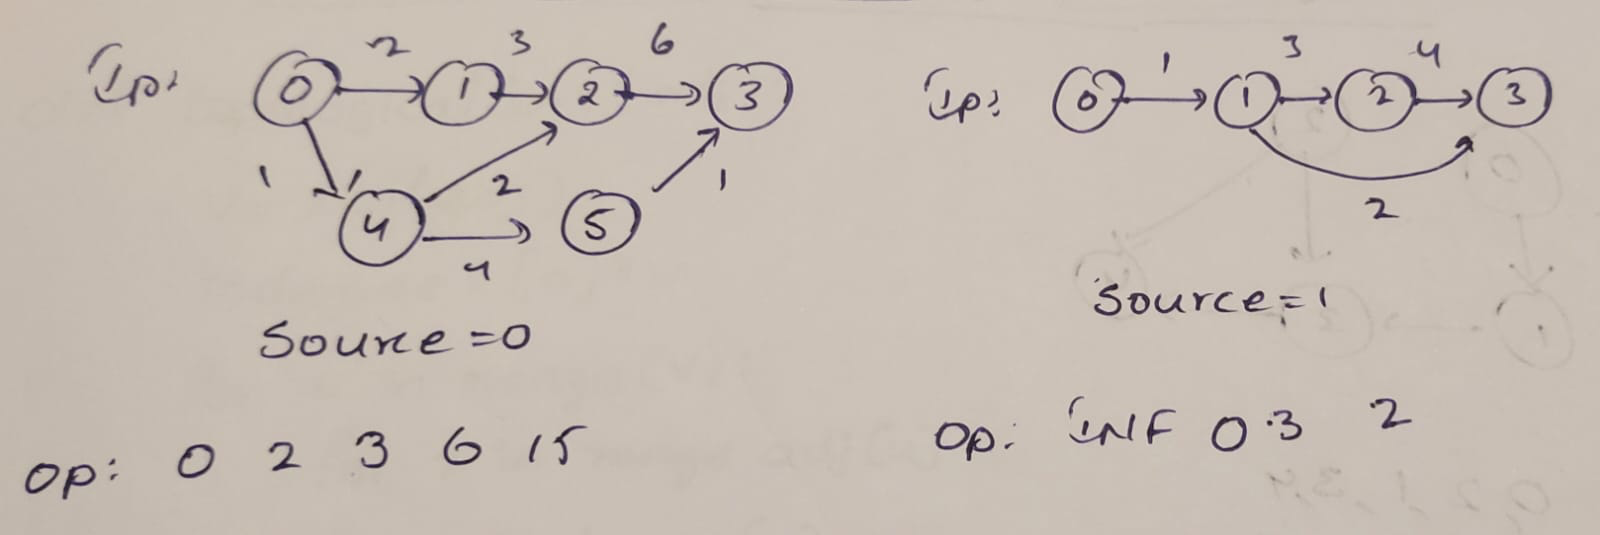

    Shortest Path(adj, s):

      1. Initialize dist[v] = [INF, INF,.......]
      2. dist[s] = 0
      3. Find a topological sort of the graph
      4. For every vertex u in the topological sort
        a. For every vertex u in the topological sort
              if dist[v] > dist[u] + weight(u, v)
                    dist[v] = dist[u] + weight(u, v)

    Time Complexity : O(V + E)

In [16]:
# Implementation

from collections import defaultdict

def DFS(v, visited, stack, adj):
    visited[v] = True

    for i in adj[v]:
        if not visited[i[0]]:
            DFS(i[0], visited, stack, adj)

    stack.append(v)

def shortestPath(adj, V, s):
    dist = [float('inf')] * V
    dist[s] = 0

    visited = [False] * V
    stack = []

    for i in range(V):
        if not visited[i]:
            DFS(i, visited, stack, adj)

    while stack:
        u = stack.pop()

        if dist[u] != float('inf'):
            for v, weight in adj[u]:
                if dist[v] > dist[u] + weight:
                    dist[v] = dist[u] + weight

    for i in range(V):
        if dist[i] == float('inf'):
            print(f"Vertex {i}: INF")
        else:
            print(f"Vertex {i}: {dist[i]}")

adj = defaultdict(list)
adj[0].append((1, 2))
adj[0].append((4, 1))
adj[1].append((2, 3))
adj[4].append((2, 2))
adj[4].append((5, 4))
adj[2].append((3, 6))
adj[5].append((3, 1))

V = 6
source = 0

shortestPath(adj, V, source)

Vertex 0: 0
Vertex 1: 2
Vertex 2: 3
Vertex 3: 6
Vertex 4: 1
Vertex 5: 5
